In [486]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [488]:
#import and read .csv files
data2018= pd.read_csv('../data_files/raw/2018.csv', encoding='ISO-8859-1')
data2019= pd.read_csv('../data_files/raw/2019.csv', encoding='ISO-8859-1')
data2020= pd.read_csv('../data_files/raw/2020.csv', encoding='ISO-8859-1')
data2021= pd.read_csv('../data_files/raw/2021.csv', encoding='ISO-8859-1')
data2022= pd.read_csv('../data_files/raw/2022.csv', encoding='ISO-8859-1')

In [490]:
#Function to clean columns names
def format_columns(df,year):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    df.insert(0, 'year', year)

    return df

In [492]:
data2018 = format_columns(data2018, 2018)
data2019 = format_columns(data2019, 2019)
data2020 = format_columns(data2020, 2020)
data2021 = format_columns(data2021, 2021)
data2022 = format_columns(data2022, 2022)

In [494]:
#Rename the columns
data2018 = data2018.rename(columns={'score': 'ladder_score'})
data2018.head()

,year,overall_rank,country_or_region,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2018,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,2018,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,2018,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,2018,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [496]:
data2019 = data2019.rename(columns={'score': 'ladder_score'})
data2019.head()

,year,overall_rank,country_or_region,ladder_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,2019,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [498]:
#sort df_202 by ladder_score to be sure is sorted, restart index and place rank to each country
data2020 = data2020.sort_values(by='ladder_score', ascending=False)
data2020.reset_index(drop=True, inplace=True)
data2020.insert(1, "rank", range(1, len(data2020) + 1))
data2020

,year,rank,country_name,regional_indicator,ladder_score,standard_error_of_ladder_score,upperwhisker,lowerwhisker,logged_gdp_per_capita,social_support,...,generosity,perceptions_of_corruption,ladder_score_in_dystopia,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2020,1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,...,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2020,2,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,2020,3,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,2020,4,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,2020,5,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,...,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2020,149,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,...,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,2020,150,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,...,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,2020,151,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,...,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,2020,152,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,...,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [500]:
# columns to drop
columns_to_keep_2020 = [
    'year',
    'rank',
    'country_name',
    'ladder_score',
    'explained_by:_log_gdp_per_capita',
    'explained_by:_social_support',
    'explained_by:_healthy_life_expectancy',
    'explained_by:_freedom_to_make_life_choices',
    'explained_by:_generosity',
    'explained_by:_perceptions_of_corruption',
    'dystopia_+_residual'
]
data2020 = data2020[columns_to_keep_2020]
data2020.head()

,year,rank,country_name,ladder_score,explained_by:_log_gdp_per_capita,explained_by:_social_support,explained_by:_healthy_life_expectancy,explained_by:_freedom_to_make_life_choices,explained_by:_generosity,explained_by:_perceptions_of_corruption,dystopia_+_residual
0,2020,1,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,2020,2,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,2020,3,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,2020,4,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,2020,5,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [502]:
data2018.columns

Index(['year', 'overall_rank', 'country_or_region', 'ladder_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [504]:
data2018.columns= [
    "year", "rank", "country", "happiness", "GDP", "social_support", 
    "healthy", "freedom", "generosity", "corruption"
]

In [506]:
data2019.columns

Index(['year', 'overall_rank', 'country_or_region', 'ladder_score',
       'gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

In [508]:
data2019.columns= [
    "year", "rank", "country", "happiness", "GDP", "social_support", 
    "healthy", "freedom", "generosity", "corruption"
]

In [510]:
data2020.columns

Index(['year', 'rank', 'country_name', 'ladder_score',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')

In [512]:
data2020.columns= [
    "year", "rank", "country", "happiness", "GDP", "social_support", 
    "healthy", "freedom", "generosity", "corruption", "dystopia"
]

In [514]:
data2021.columns

Index(['year', 'ï»¿country_name', 'regional_indicator', 'ladder_score',
       'standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker',
       'logged_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'],
      dtype='object')

In [516]:
data2021.columns= [
    "year", "country", "region", "happiness", "std", "high", "low", "GDP", "social_support", 
    "healthy", "freedom", "generosity", "corruption", "dystopia", "exp_GDP", "exp_social",
    "exp_healthy", "exp_freedom", "exp_generosity", "exp_corruption", "dystopia_residual"
]

In [518]:
# columns to drop in 2021
columns_to_keep_2021 = [
    'year',
    'country',
    'happiness',
    'exp_GDP',
    'exp_social',
    'exp_healthy',
    'exp_freedom',
    'exp_generosity',
    'exp_corruption',
    'dystopia_residual'
]
data2021 = data2021[columns_to_keep_2021]
data2021.head()

,year,country,happiness,exp_GDP,exp_social,exp_healthy,exp_freedom,exp_generosity,exp_corruption,dystopia_residual
0,2021,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,2021,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,2021,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,2021,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,2021,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [520]:
# add columns RANK to 2021
data2021.loc[:, 'rank'] = range(1, len(data2021) + 1)

# Insert 'rank' as the second column
data2021.insert(1, 'rank', data2021.pop('rank'))
data2021.columns

Index(['year', 'rank', 'country', 'happiness', 'exp_GDP', 'exp_social',
       'exp_healthy', 'exp_freedom', 'exp_generosity', 'exp_corruption',
       'dystopia_residual'],
      dtype='object')

In [522]:
data2021.columns= [
    "year", "rank", "country", "happiness", "GDP", "social_support", 
    "healthy", "freedom", "generosity", "corruption", "dystopia"
]
data2021.columns

Index(['year', 'rank', 'country', 'happiness', 'GDP', 'social_support',
       'healthy', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [524]:
data2021.columns

Index(['year', 'rank', 'country', 'happiness', 'GDP', 'social_support',
       'healthy', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [526]:
data2022.columns

Index(['year', 'rank', 'country', 'happiness_score', 'whisker-high',
       'whisker-low', 'dystopia_(1.83)_+_residual',
       'explained_by:_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption'],
      dtype='object')

In [528]:
data2022.columns= [
    "year","rank","country", "happiness", "high", "low", "dystopia", "GDP", "social_support",
    "healthy", "freedom", "generosity", "corruption", 
]
data2022 = data2022.drop(columns=['high', 'low'])
data2022.columns

Index(['year', 'rank', 'country', 'happiness', 'dystopia', 'GDP',
       'social_support', 'healthy', 'freedom', 'generosity', 'corruption'],
      dtype='object')

In [530]:
# To clean the country names and delete the last row
data2022['country'] = data2022['country'].str.replace('*', '', regex=False)
data2022 = data2022.drop(146)
data2022

,year,rank,country,happiness,dystopia,GDP,social_support,healthy,freedom,generosity,corruption
0,2022,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...
141,2022,142,Botswana,"3,471","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,143,Rwanda,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,144,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,145,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [532]:
data2022

,year,rank,country,happiness,dystopia,GDP,social_support,healthy,freedom,generosity,corruption
0,2022,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...
141,2022,142,Botswana,"3,471","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,143,Rwanda,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,144,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,145,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [534]:
data2022.head(10)

,year,rank,country,happiness,dystopia,GDP,social_support,healthy,freedom,generosity,corruption
0,2022,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,2022,6,Luxembourg,"7,404","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,2022,7,Sweden,"7,384","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,2022,8,Norway,"7,365","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,2022,9,Israel,"7,364","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,2022,10,New Zealand,"7,200","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


In [536]:
data2022

,year,rank,country,happiness,dystopia,GDP,social_support,healthy,freedom,generosity,corruption
0,2022,1,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2022,2,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,2022,3,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,2022,4,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,2022,5,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
...,...,...,...,...,...,...,...,...,...,...,...
141,2022,142,Botswana,"3,471","0,187","1,503","0,815","0,280","0,571","0,012","0,102"
142,2022,143,Rwanda,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,2022,144,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,2022,145,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034"


In [538]:
# To change the order of the columns
new_column_order = [
    'year', 'rank', 'country', 'happiness', 'GDP', 
    'social_support', 'healthy', 'freedom', 'generosity', 
    'corruption', 'dystopia'
]

data2022 = data2022[new_column_order]

In [543]:
data2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            146 non-null    int64 
 1   rank            146 non-null    int64 
 2   country         146 non-null    object
 3   happiness       146 non-null    object
 4   GDP             146 non-null    object
 5   social_support  146 non-null    object
 6   healthy         146 non-null    object
 7   freedom         146 non-null    object
 8   generosity      146 non-null    object
 9   corruption      146 non-null    object
 10  dystopia        146 non-null    object
dtypes: int64(2), object(9)
memory usage: 12.7+ KB


In [548]:
# To change the data types of the columns that should be numerical 
columns_to_numerical = ['happiness', 'GDP', 'social_support', 'healthy', 'freedom', 'generosity','corruption', 'dystopia']

In [551]:
for col in columns_to_numerical:
    data2022[col] = data2022[col].apply(lambda x: float( x.replace(",",".") ) )

In [555]:
data2022.head()

,year,rank,country,happiness,GDP,social_support,healthy,freedom,generosity,corruption,dystopia
0,2022,1,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2.518
1,2022,2,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2.226
2,2022,3,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2.320
3,2022,4,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,2.153
4,2022,5,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2.137


In [587]:
data2019.columns= [
    "year", "rank2019", "country", "happiness2019", "GDP2019", "social_support2019", 
    "healthy2019", "freedom2019", "generosity2019", "corruption2019"
]
data2019.columns

Index(['year', 'rank2019', 'country', 'happiness2019', 'GDP2019',
       'social_support2019', 'healthy2019', 'freedom2019', 'generosity2019',
       'corruption2019'],
      dtype='object')

In [595]:
data2020.columns= [
    "year", "rank2020", "country", "happiness2020", "GDP2020", "social_support2020", 
    "healthy2020", "freedom2020", "generosity2020", "corruption2020", "dystopia2020"
]
data2020.columns

Index(['year', 'rank2020', 'country', 'happiness2020', 'GDP2020',
       'social_support2020', 'healthy2020', 'freedom2020', 'generosity2020',
       'corruption2020', 'dystopia2020'],
      dtype='object')

In [599]:
data2021.columns= [
    "year", "rank2021", "country", "happiness2021", "GDP2021", "social_support2021", 
    "healthy2021", "freedom2021", "generosity2021", "corruption2021", "dystopia2021"
]
data2021.columns

Index(['year', 'rank2021', 'country', 'happiness2021', 'GDP2021',
       'social_support2021', 'healthy2021', 'freedom2021', 'generosity2021',
       'corruption2021', 'dystopia2021'],
      dtype='object')

In [601]:
data2022.columns

Index(['year', 'rank', 'country', 'happiness', 'GDP', 'social_support',
       'healthy', 'freedom', 'generosity', 'corruption', 'dystopia'],
      dtype='object')

In [603]:
data2022.columns= [
    "year", "rank2022", "country", "happiness2022", "GDP2022", "social_support2022", 
    "healthy2022", "freedom2022", "generosity2022", "corruption2022", "dystopia2022"
]
data2022.columns

Index(['year', 'rank2022', 'country', 'happiness2022', 'GDP2022',
       'social_support2022', 'healthy2022', 'freedom2022', 'generosity2022',
       'corruption2022', 'dystopia2022'],
      dtype='object')

In [607]:
results = {
    'year': ['2018', '2019', '2020', "2021", "2022"],
    'mean': [
        data2018['happiness'].mean(),
        data2019['happiness2019'].mean(),
        data2020['happiness2020'].mean(),
        data2021['happiness2021'].mean(),
        data2022['happiness2022'].mean()
        
    ],
    'median': [
        data2018['happiness'].median(),
        data2019['happiness2019'].median(),
        data2020['happiness2020'].median(),
        data2021['happiness2021'].median(),
        data2022['happiness2022'].median()
    ],
    'std': [
        data2018['happiness'].std(),
        data2019['happiness2019'].std(),
        data2020['happiness2020'].std(),
        data2021['happiness2021'].std(),
        data2022['happiness2022'].std()
    ]
}

df_summary = pd.DataFrame(results)
df_summary

,year,mean,median,std
0,2018,5.375917,5.3780,1.119506
1,2019,5.407096,5.3795,1.113120
2,2020,5.473240,5.5150,1.112270
3,2021,5.532839,5.5340,1.073924
4,2022,5.553575,5.5685,1.086843


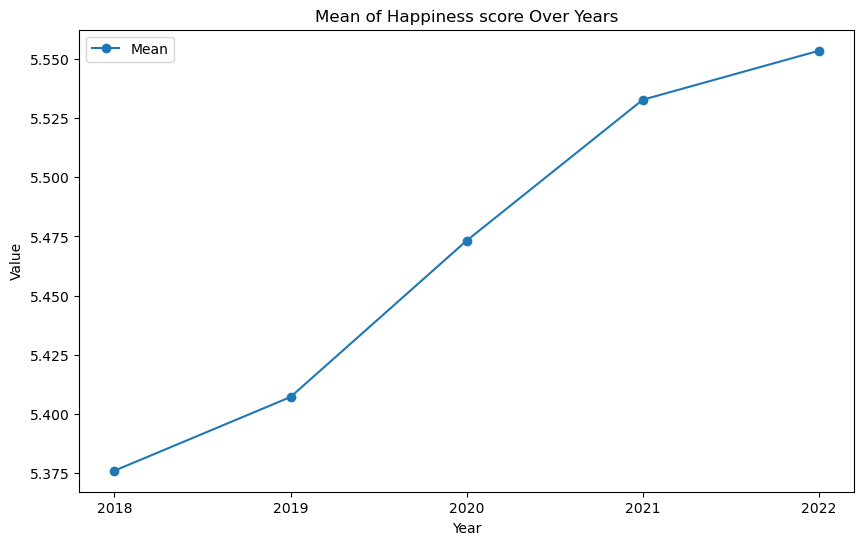

In [611]:
plt.figure(figsize=(10, 6))
plt.plot(df_summary['year'], df_summary['mean'], label='Mean', marker='o')
plt.title('Mean of Happiness score Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [615]:
data2018.to_csv('../data_files/clean/2018_clean.csv', index=False)

In [617]:
data2019.to_csv('../data_files/clean/2019_clean.csv', index=False)
data2020.to_csv('../data_files/clean/2020_clean.csv', index=False)
data2021.to_csv('../data_files/clean/2021_clean.csv', index=False)
data2022.to_csv('../data_files/clean/2022_clean.csv', index=False)